In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [4]:
df['Age'].mean()

29.69911764705882

In [5]:
df['Age'].median()

28.0

In [6]:
df['Age'].mode()

,Age
0,24.0


In [7]:
df['Age'].std()

14.526497332334044

In [8]:
df['Age'].skew()

0.38910778230082704

In [9]:
df['Age'].quantile(0.25) # 25th percentile

20.125

In [10]:
df['Age'].quantile(0.50) # 50th percentile (median)

28.0

In [11]:
df['Age'].quantile(0.75) # 75th percentile (median)

38.0

## Detecting outlier by box plot (IQR method)

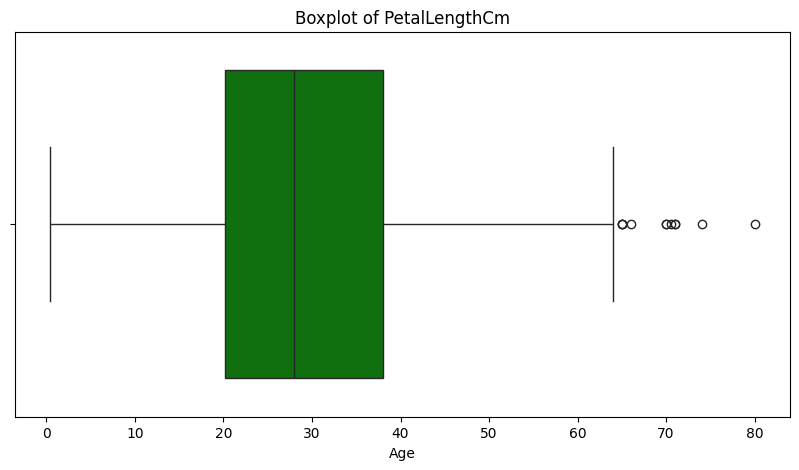

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Age', color='green')
plt.title(f'Boxplot of PetalLengthCm')
plt.show()

In [13]:
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25) #IQR = 75 percentile - 25 perentile
iqr

17.875

In [14]:
lower_bound = df['Age'].quantile(0.25) - (1.5 * iqr) #lower whiker = 25 percentile - 1.5 * IQR
lower_bound

-6.6875

In [15]:
upper_bound = df['Age'].quantile(0.75) + (1.5 * iqr) #Upper whiker = 75 percentile + 1.5 * IQR
upper_bound

64.8125

In [16]:
df[df['Age'] > upper_bound]

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [ ]:
df[df['Age'] < lower_bound]

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Detecting outlier by Normal distribution

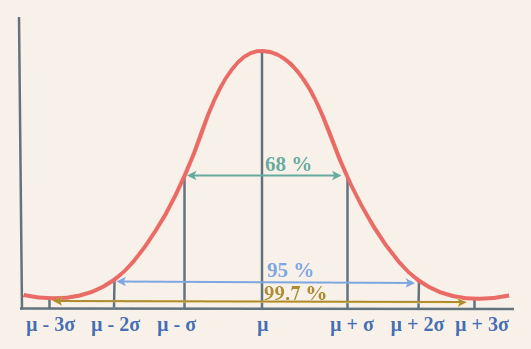

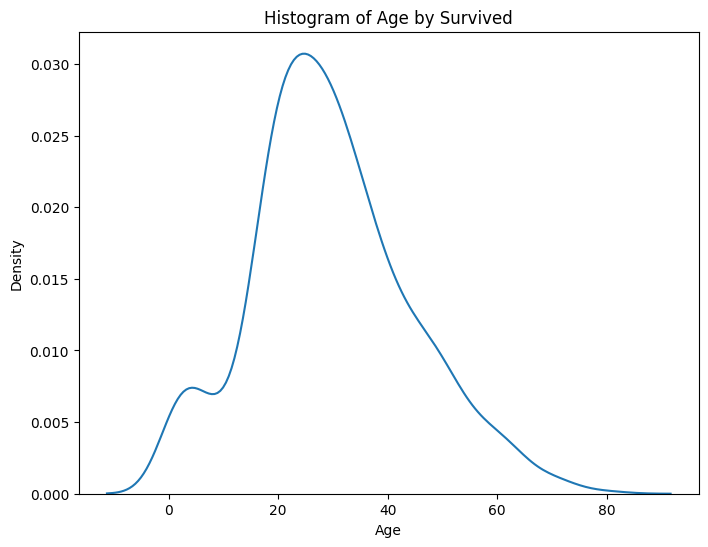

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Age', palette='hls')
plt.title('Histogram of Age by Survived')
plt.show()

In [ ]:
df['Age'].skew()

0.38910778230082704

In [ ]:
mu = df['Age'].mean()
mu

29.69911764705882

In [ ]:
sigma = df['Age'].std()
sigma

14.526497332334044

In [ ]:
mu - 3*sigma

-13.88037434994331

In [ ]:
mu + 3*sigma

73.27860964406095

In [ ]:
df[df['Age'] > (mu + 3*sigma)]

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [ ]:
df[df['Age'] < (mu - 3*sigma)]

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Correlation

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
numerical_columns = ["Age", "Fare"]
df[numerical_columns]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [20]:
df[numerical_columns].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


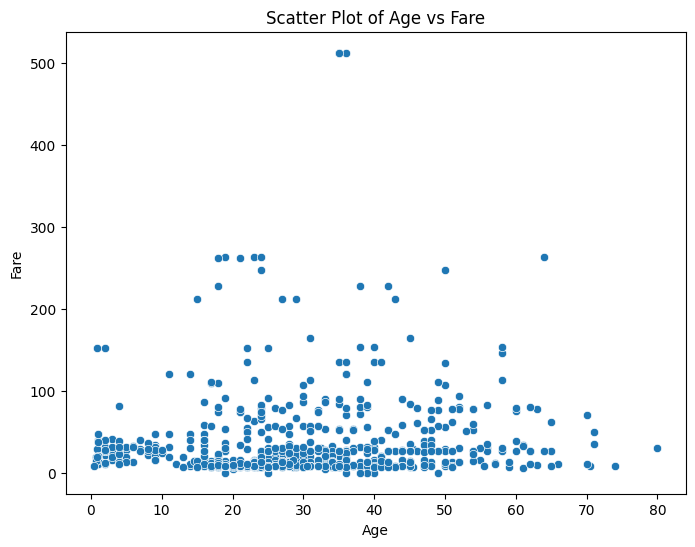

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Fare')
plt.title('Scatter Plot of Age vs Fare')
plt.show()